In [390]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from xgboost.sklearn import XGBClassifier
import sklearn
import statsmodels
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import copy
import requests
import pprint
import xgboost
import scipy
import warnings
import re
from datetime import datetime
from scipy import stats
from urllib import parse
from bs4 import BeautifulSoup

# ÏßÄÏàò ÌòïÌÉúÏùò Ïã§ÏàòÎ•º ÏÜåÏàòÏ†ê 3ÏûêÎ¶¨ÍπåÏßÄ ÌëúÍ∏∞
pd.options.display.float_format = "{:.3f}".format

# Í≥µÏú† Ìè¥Îçî Í≤ΩÎ°ú
dirShare = ".."

# Í≤ΩÍ≥† Ï∂úÎ†• Î¨¥Ïãú
warnings.filterwarnings("ignore")

In [ ]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†Ñ ÌôïÏù∏
print("pandas ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + pd.__version__)
print("scikit-learn ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + sklearn.__version__)
print("scipy ÌòÑÏû¨ Î≤ÑÏ†Ñ : "+ scipy.__version__)
print("statsmodels ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + statsmodels.__version__)
print("xgboost ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + xgboost.__version__)

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í≥† Ï†ÑÏ≤òÎ¶¨

## Í∏∞Î≥∏Ï†ÑÏ≤òÎ¶¨

In [391]:
# train.csv Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(dirShare+"/data/train.csv")

# # df Ï†ïÎ≥¥ ÌôïÏù∏
# df.info()

# # df ÏÉÅÏúÑ 10Í∞ú Î∂àÎü¨Ïò§Í∏∞
# df.head(10)

In [392]:
df_t = pd.read_csv(dirShare+"/data/test.csv")

# df_t.info()
# df_t.head()

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏ÌïòÍ∏∞
print("train Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : ", df.shape[0])
print("test Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : ", df_t.shape[0])

# len(df)Î•º Ïç®ÎèÑ ÎèôÏùº

In [ ]:
# Ïà´Ïûê ÌòïÏãùÏùò Ïª¨ÎüºÏùò Í∏∞Ïà†ÌÜµÍ≥ÑÍ∞íÏùÑ Ï∂úÎ†•, train.csv
df.describe()

In [ ]:
# Ïà´Ïûê ÌòïÏãùÏùò Ïª¨ÎüºÏùò Í∏∞Ïà†ÌÜµÍ≥ÑÍ∞íÏùÑ Ï∂úÎ†•, test.csv
df_t.describe()

In [ ]:
# Ïª¨ÎüºÎ≥Ñ null Í∞í ÌôïÏù∏ÌïòÍ∏∞, train.csv
df.shape[0] - df.count()

In [ ]:
# Ïª¨ÎüºÎ≥Ñ null Í∞í ÌôïÏù∏ÌïòÍ∏∞, test.csv
df_t.shape[0] - df_t.count()

In [393]:
# employee Ïª¨ÎüºÏù¥ object ÌÉÄÏûÖÏù¥Í≥†, Ïà´ÏûêÏóê ','Ïù¥ Ìè¨Ìï®Îèº ÏûàÏñ¥ Ï†ïÍ∑ú ÌëúÌòÑÏãùÏúºÎ°ú ÏóÜÏï∞
for i in range(2) : 
    df_t["employee"+str(i+1)] = df_t["employee"+str(i+1)].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))

df_t[["employee1", "employee2"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   employee1  127 non-null    object
 1   employee2  127 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [394]:
# Ïã§Ïàò ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÍ≤Ω
df_t["employee1"].replace("", np.NaN, inplace=True)
df_t["employee2"].replace("", np.NaN, inplace=True)
df_t[["employee1", "employee2"]] = df_t[["employee1", "employee2"]].astype("float64")
df_t[["employee1", "employee2"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   employee1  119 non-null    float64
 1   employee2  112 non-null    float64
dtypes: float64(2)
memory usage: 2.1 KB


In [ ]:
df_t[["employee1", "employee2"]].head()

In [396]:
# trainÍ≥º testÎ•º ÏùºÏãúÏ†ÅÏúºÎ°ú Ìï©Ïπ®
df_merge = pd.concat(objs=[df,df_t], axis=0)
print("Ìï©Ïπú Îç∞Ïù¥ÌÑ∞ Ïàò : ",len(df_merge))
df_merge.head()

Ìï©Ïπú Îç∞Ïù¥ÌÑ∞ Ïàò :  428


inst_id    OC       sido  sgg     openDate  bedCount          instkind  \
0        1  open  choongnam   73 20071228.000   175.000  nursing_hospital   
1        3  open  gyeongnam   32 19970401.000   410.000  general_hospital   
2        4  open   gyeonggi   89 20161228.000   468.000  nursing_hospital   
3        7  open    incheon  141 20000814.000   353.000  general_hospital   
4        9  open  gyeongnam   32 20050901.000   196.000  general_hospital   

         revenue1    salescost1            sga1  ...           debt2  \
0  4217530010.000         0.000  3961134739.000  ...   758993742.000   
1             NaN           NaN             NaN  ...             NaN   
2  1004521989.000 515483669.000   447219722.000  ...           0.000   
3 72507342181.000         0.000 70677397660.000  ... 37755010512.000   
4 49043538016.000         0.000 47656051197.000  ... 51432592890.000   

   liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
0       222876855.000           0.000   536116887.000   390000000.000   
1                 NaN             NaN             NaN             NaN   
2               0.000           0.000           0.000           0.000   
3     17018596586.000  9219427379.000 20736413926.000 15100000000.000   
4     30072585842.000 17593752360.000 21360007048.000 14108027465.000   

        netAsset2       surplus2  employee1  employee2  ownerChange  
0  2619290493.000 1271224493.000     62.000     64.000         same  
1             NaN            NaN    801.000    813.000         same  
2           0.000          0.000    234.000      1.000         same  
3 12954271998.000 7740829037.000    663.000    663.000         same  
4     5561941.000 9025549604.000    206.000    197.000         same  

[5 rows x 58 columns]

In [397]:
# ÏïÑÏßÅ Ïö¥ÏòÅ Ï§ëÏù∏ Î≥ëÏõêÏùÑ 1Î°ú Î≥ÄÌôò
df_merge.replace({"open":1},inplace=True)
# ÌèêÏóÖÌïú Î≥ëÏõêÏùÑ 0ÏúºÎ°ú Î≥ÄÌôò
df_merge.replace({" close":0}, inplace=True)
# unique() Î©îÏÑúÎìúÎ•º ÌÜµÌï¥ "OC" Ïª¨ÎüºÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏
# df["OC"].unique()
df_merge.head()

inst_id    OC       sido  sgg     openDate  bedCount          instkind  \
0        1 1.000  choongnam   73 20071228.000   175.000  nursing_hospital   
1        3 1.000  gyeongnam   32 19970401.000   410.000  general_hospital   
2        4 1.000   gyeonggi   89 20161228.000   468.000  nursing_hospital   
3        7 1.000    incheon  141 20000814.000   353.000  general_hospital   
4        9 1.000  gyeongnam   32 20050901.000   196.000  general_hospital   

         revenue1    salescost1            sga1  ...           debt2  \
0  4217530010.000         0.000  3961134739.000  ...   758993742.000   
1             NaN           NaN             NaN  ...             NaN   
2  1004521989.000 515483669.000   447219722.000  ...           0.000   
3 72507342181.000         0.000 70677397660.000  ... 37755010512.000   
4 49043538016.000         0.000 47656051197.000  ... 51432592890.000   

   liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
0       222876855.000           0.000   536116887.000   390000000.000   
1                 NaN             NaN             NaN             NaN   
2               0.000           0.000           0.000           0.000   
3     17018596586.000  9219427379.000 20736413926.000 15100000000.000   
4     30072585842.000 17593752360.000 21360007048.000 14108027465.000   

        netAsset2       surplus2  employee1  employee2  ownerChange  
0  2619290493.000 1271224493.000     62.000     64.000         same  
1             NaN            NaN    801.000    813.000         same  
2           0.000          0.000    234.000      1.000         same  
3 12954271998.000 7740829037.000    663.000    663.000         same  
4     5561941.000 9025549604.000    206.000    197.000         same  

[5 rows x 58 columns]

In [398]:
# Ïò§ÎÑà Î≥ÄÌôò Ïó¨Î∂Ä
df_merge["ownerChange"].replace({"same":0},inplace=True)
df_merge["ownerChange"].replace({"change":1},inplace=True)
# df["ownerChange"].unique()
df_merge.head()

inst_id    OC       sido  sgg     openDate  bedCount          instkind  \
0        1 1.000  choongnam   73 20071228.000   175.000  nursing_hospital   
1        3 1.000  gyeongnam   32 19970401.000   410.000  general_hospital   
2        4 1.000   gyeonggi   89 20161228.000   468.000  nursing_hospital   
3        7 1.000    incheon  141 20000814.000   353.000  general_hospital   
4        9 1.000  gyeongnam   32 20050901.000   196.000  general_hospital   

         revenue1    salescost1            sga1  ...           debt2  \
0  4217530010.000         0.000  3961134739.000  ...   758993742.000   
1             NaN           NaN             NaN  ...             NaN   
2  1004521989.000 515483669.000   447219722.000  ...           0.000   
3 72507342181.000         0.000 70677397660.000  ... 37755010512.000   
4 49043538016.000         0.000 47656051197.000  ... 51432592890.000   

   liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
0       222876855.000           0.000   536116887.000   390000000.000   
1                 NaN             NaN             NaN             NaN   
2               0.000           0.000           0.000           0.000   
3     17018596586.000  9219427379.000 20736413926.000 15100000000.000   
4     30072585842.000 17593752360.000 21360007048.000 14108027465.000   

        netAsset2       surplus2  employee1  employee2  ownerChange  
0  2619290493.000 1271224493.000     62.000     64.000        0.000  
1             NaN            NaN    801.000    813.000        0.000  
2           0.000          0.000    234.000      1.000        0.000  
3 12954271998.000 7740829037.000    663.000    663.000        0.000  
4     5561941.000 9025549604.000    206.000    197.000        0.000  

[5 rows x 58 columns]

In [ ]:
df_merge["instkind"].unique()

In [399]:
# ÏòÅÏóÖÏù¥Ïùµ Ïª¨Îüº Ï∂îÍ∞Ä(Îß§Ï∂úÏï° - Îß§Ï∂úÏõêÍ∞Ä - ÌåêÎß§ Í¥ÄÎ¶¨ÎπÑ - Í∏âÏó¨)
# revenue - salescost - sga - salary

for i in range(2) : 
    df_merge.insert(loc=(24*(i)+11), column="busiProfit"+str(i+1), value=(df_merge["revenue"+str(i+1)]-df_merge["salescost"+str(i+1)]-df_merge["sga"+str(i+1)]-df_merge["salary"+str(i+1)]))

df_merge.head()

inst_id    OC       sido  sgg     openDate  bedCount          instkind  \
0        1 1.000  choongnam   73 20071228.000   175.000  nursing_hospital   
1        3 1.000  gyeongnam   32 19970401.000   410.000  general_hospital   
2        4 1.000   gyeonggi   89 20161228.000   468.000  nursing_hospital   
3        7 1.000    incheon  141 20000814.000   353.000  general_hospital   
4        9 1.000  gyeongnam   32 20050901.000   196.000  general_hospital   

         revenue1    salescost1            sga1  ...           debt2  \
0  4217530010.000         0.000  3961134739.000  ...   758993742.000   
1             NaN           NaN             NaN  ...             NaN   
2  1004521989.000 515483669.000   447219722.000  ...           0.000   
3 72507342181.000         0.000 70677397660.000  ... 37755010512.000   
4 49043538016.000         0.000 47656051197.000  ... 51432592890.000   

   liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
0       222876855.000           0.000   536116887.000   390000000.000   
1                 NaN             NaN             NaN             NaN   
2               0.000           0.000           0.000           0.000   
3     17018596586.000  9219427379.000 20736413926.000 15100000000.000   
4     30072585842.000 17593752360.000 21360007048.000 14108027465.000   

        netAsset2       surplus2  employee1  employee2  ownerChange  
0  2619290493.000 1271224493.000     62.000     64.000        0.000  
1             NaN            NaN    801.000    813.000        0.000  
2           0.000          0.000    234.000      1.000        0.000  
3 12954271998.000 7740829037.000    663.000    663.000        0.000  
4     5561941.000 9025549604.000    206.000    197.000        0.000  

[5 rows x 60 columns]

In [400]:
# Î≥ëÏõê Ï¢ÖÎ•ò Î≥Ñ Î≥ëÏÉÅ ÏàòÏùò Ï∞®Ïù¥
df_bed = df_merge.groupby("instkind",axis=0)["bedCount"].count()
df_bed

instkind
clinic                   22
dental_clinic             1
general_hospital         56
hospital                120
nursing_hospital        204
traditional_clinic        5
traditional_hospital      6
Name: bedCount, dtype: int64

In [ ]:
# Î≥ëÏõêÏùò Î≥ëÏÉÅ ÏàòÍ∞Ä ÎßéÏúºÎ©¥ Í∑∏ÎßåÌÅº ÌôòÏûê ÏàòÏö© ÏàòÍ∞Ä ÎßéÏúºÎãà Î≥ëÏõê ÏÑúÎπÑÏä§Í∞Ä Îçî Ï¢ãÏïÑÏßÄÎäî Í≤ÉÏù¥ ÏïÑÎãêÍπå?

plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12,8))
    
plt.bar(x=df_bed.index, height=df_bed, color="#009933")
plt.title("Î≥ëÏõê Ï¢ÖÎ•òÎ≥Ñ Î≥ëÏÉÅ Ïàò")
plt.xlabel("Î≥ëÏõê Ï¢ÖÎ•ò")
plt.ylabel("Î≥ëÏÉÅ Í∞ØÏàò")
plt.show()

In [401]:
# Í∞úÏóÖÌïú ÎÇ†ÏßúÎäî Î≥ÄÏàòÎ°úÏÑú ÏùòÎØ∏Í∞Ä ÏóÜÏùå. Î™®Îç∏ÏùÄ ÎÇ†ÏßúÎ•º Ïù∏ÏãùÌïòÏßÄ Î™ªÌïòÍ∏∞ ÎïåÎ¨∏Ïóê
# Í∞úÏóÖ ÎÇ†ÏßúÏôÄ ÌèêÏóÖ ÎÇ†ÏßúÏùò Ï∞®Ïù¥Î°ú Î≥ÄÏàòÎ•º Ï°∞Ï†ïÌï† ÌïÑÏöîÍ∞Ä ÏûàÏùå

date_of_2018 = "2018-01-01"

# Î¨∏Ïûê ÌÉÄÏûÖÏùÑ date ÌÉÄÏûÖÏúºÎ°ú

# df["openDate"] = df["openDate"].apply(lambda x : datetime.strptime(str(x), "%Y%m%d")) # ValueError: unconverted data remains: .0
df_merge["openDate"] = pd.to_datetime(df_merge["openDate"], format="%Y%m%d")

# ÎÇ†Ïßú Ï∞®Ïù¥Î•º ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏúºÎ°ú ÏÉùÏÑ±, Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ Ï§ëÍ∞ÑÏóê ÏÇΩÏûÖ
df_merge.insert(2, "dif_date", datetime.strptime(date_of_2018,"%Y-%m-%d")-df_merge["openDate"])
df_merge["dif_date"] = df_merge["dif_date"].dt.days

df_merge.drop(labels="openDate", axis=1, inplace=True)

df_merge["dif_date"].tail()
df_merge.head()

inst_id    OC  dif_date       sido  sgg  bedCount          instkind  \
0        1 1.000  3657.000  choongnam   73   175.000  nursing_hospital   
1        3 1.000  7580.000  gyeongnam   32   410.000  general_hospital   
2        4 1.000   369.000   gyeonggi   89   468.000  nursing_hospital   
3        7 1.000  6349.000    incheon  141   353.000  general_hospital   
4        9 1.000  4505.000  gyeongnam   32   196.000  general_hospital   

         revenue1    salescost1            sga1  ...           debt2  \
0  4217530010.000         0.000  3961134739.000  ...   758993742.000   
1             NaN           NaN             NaN  ...             NaN   
2  1004521989.000 515483669.000   447219722.000  ...           0.000   
3 72507342181.000         0.000 70677397660.000  ... 37755010512.000   
4 49043538016.000         0.000 47656051197.000  ... 51432592890.000   

   liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
0       222876855.000           0.000   536116887.000   390000000.000   
1                 NaN             NaN             NaN             NaN   
2               0.000           0.000           0.000           0.000   
3     17018596586.000  9219427379.000 20736413926.000 15100000000.000   
4     30072585842.000 17593752360.000 21360007048.000 14108027465.000   

        netAsset2       surplus2  employee1  employee2  ownerChange  
0  2619290493.000 1271224493.000     62.000     64.000        0.000  
1             NaN            NaN    801.000    813.000        0.000  
2           0.000          0.000    234.000      1.000        0.000  
3 12954271998.000 7740829037.000    663.000    663.000        0.000  
4     5561941.000 9025549604.000    206.000    197.000        0.000  

[5 rows x 60 columns]

In [402]:
# Î≥ëÏõêÏùò Ï¢ÖÎ•òÎ•º, get_dummiesÎ•º Ïù¥Ïö©Ìï¥ one-hot-encoding
df_m = pd.get_dummies(df_merge, columns=["instkind"], prefix=["instkind"], prefix_sep="_", dtype=int)
df_m.head()

inst_id    OC  dif_date       sido  sgg  bedCount        revenue1  \
0        1 1.000  3657.000  choongnam   73   175.000  4217530010.000   
1        3 1.000  7580.000  gyeongnam   32   410.000             NaN   
2        4 1.000   369.000   gyeonggi   89   468.000  1004521989.000   
3        7 1.000  6349.000    incheon  141   353.000 72507342181.000   
4        9 1.000  4505.000  gyeongnam   32   196.000 49043538016.000   

     salescost1            sga1         salary1  ...  employee1  employee2  \
0         0.000  3961134739.000  2033835290.000  ...     62.000     64.000   
1           NaN             NaN             NaN  ...    801.000    813.000   
2 515483669.000   447219722.000   296402310.000  ...    234.000      1.000   
3         0.000 70677397660.000 31786048663.000  ...    663.000    663.000   
4         0.000 47656051197.000 24460782270.000  ...    206.000    197.000   

   ownerChange  instkind_clinic  instkind_dental_clinic  \
0        0.000                0                       0   
1        0.000                0                       0   
2        0.000                0                       0   
3        0.000                0                       0   
4        0.000                0                       0   

   instkind_general_hospital  instkind_hospital  instkind_nursing_hospital  \
0                          0                  0                          1   
1                          1                  0                          0   
2                          0                  0                          1   
3                          1                  0                          0   
4                          1                  0                          0   

   instkind_traditional_clinic  instkind_traditional_hospital  
0                            0                              0  
1                            0                              0  
2                            0                              0  
3                            0                              0  
4                            0                              0  

[5 rows x 66 columns]

In [403]:
df_m.reset_index(level=0, drop=True, inplace=True)

In [404]:
# ÏòÅÏñ¥Î°ú Îèº ÏûàÎäî 'ÏãúÎèÑ'Î•º ÌïúÍ∏ÄÎ°ú Î≥ÄÌôò

df_m["sido"].replace(['choongnam', 'gyeongnam', 'gyeonggi', 'incheon', 'busan',
       'jeonnam', 'seoul', 'jeonbuk', 'choongbuk', 'ulsan', 'daejeon',
       'daegu', 'gyeongbuk', 'gangwon', 'gwangju', 'sejong', 'jeju'], 
       ["Ï∂©Ï≤≠ÎÇ®ÎèÑ", "Í≤ΩÏÉÅÎÇ®ÎèÑ", "Í≤ΩÍ∏∞ÎèÑ", "Ïù∏Ï≤úÍ¥ëÏó≠Ïãú", 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ï†ÑÎùºÎÇ®ÎèÑ', 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 
        'Ï†ÑÎùºÎ∂ÅÎèÑ', 'Ï∂©Ï≤≠Î∂ÅÎèÑ', 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú', 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú', 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú', "Í≤ΩÏÉÅÎ∂ÅÎèÑ", "Í∞ïÏõêÎèÑ", "Í¥ëÏ£ºÍ¥ëÏó≠Ïãú", "ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú", 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ'],inplace=True)

print("df_newÏùò ÏãúÎèÑ : ",df_m["sido"].unique())
df_m.head()

df_newÏùò ÏãúÎèÑ :  ['Ï∂©Ï≤≠ÎÇ®ÎèÑ' 'Í≤ΩÏÉÅÎÇ®ÎèÑ' 'Í≤ΩÍ∏∞ÎèÑ' 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú' 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú' 'Ï†ÑÎùºÎÇ®ÎèÑ' 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú' 'Ï†ÑÎùºÎ∂ÅÎèÑ' 'Ï∂©Ï≤≠Î∂ÅÎèÑ' 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú'
 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú' 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú' 'Í≤ΩÏÉÅÎ∂ÅÎèÑ' 'Í∞ïÏõêÎèÑ' 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú' 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú' 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ']


inst_id    OC  dif_date   sido  sgg  bedCount        revenue1  \
0        1 1.000  3657.000   Ï∂©Ï≤≠ÎÇ®ÎèÑ   73   175.000  4217530010.000   
1        3 1.000  7580.000   Í≤ΩÏÉÅÎÇ®ÎèÑ   32   410.000             NaN   
2        4 1.000   369.000    Í≤ΩÍ∏∞ÎèÑ   89   468.000  1004521989.000   
3        7 1.000  6349.000  Ïù∏Ï≤úÍ¥ëÏó≠Ïãú  141   353.000 72507342181.000   
4        9 1.000  4505.000   Í≤ΩÏÉÅÎÇ®ÎèÑ   32   196.000 49043538016.000   

     salescost1            sga1         salary1  ...  employee1  employee2  \
0         0.000  3961134739.000  2033835290.000  ...     62.000     64.000   
1           NaN             NaN             NaN  ...    801.000    813.000   
2 515483669.000   447219722.000   296402310.000  ...    234.000      1.000   
3         0.000 70677397660.000 31786048663.000  ...    663.000    663.000   
4         0.000 47656051197.000 24460782270.000  ...    206.000    197.000   

   ownerChange  instkind_clinic  instkind_dental_clinic  \
0        0.000                0                       0   
1        0.000                0                       0   
2        0.000                0                       0   
3        0.000                0                       0   
4        0.000                0                       0   

   instkind_general_hospital  instkind_hospital  instkind_nursing_hospital  \
0                          0                  0                          1   
1                          1                  0                          0   
2                          0                  0                          1   
3                          1                  0                          0   
4                          1                  0                          0   

   instkind_traditional_clinic  instkind_traditional_hospital  
0                            0                              0  
1                            0                              0  
2                            0                              0  
3                            0                              0  
4                            0                              0  

[5 rows x 66 columns]

## Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞

In [405]:
# 2017ÎÖÑ ÏßÄÏó≠Î≥Ñ Ïù∏Íµ¨Ïàò Îç∞Ïù¥ÌÑ∞
# https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3
pop = pd.read_csv(dirShare+"/data/ÌñâÏ†ïÍµ¨Ïó≠_ÏãúÍµ∞Íµ¨_Î≥Ñ__ÏÑ±Î≥Ñ_Ïù∏Íµ¨Ïàò_20230718231833.csv", header=1, encoding="cp949")
pop.info()
pop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ  18 non-null     object
 1   Ï¥ùÏù∏Íµ¨Ïàò (Î™Ö)    18 non-null     int64 
 2   ÎÇ®ÏûêÏù∏Íµ¨Ïàò (Î™Ö)   18 non-null     int64 
 3   Ïó¨ÏûêÏù∏Íµ¨Ïàò (Î™Ö)   18 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 708.0+ bytes


ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ  Ï¥ùÏù∏Íµ¨Ïàò (Î™Ö)  ÎÇ®ÏûêÏù∏Íµ¨Ïàò (Î™Ö)  Ïó¨ÏûêÏù∏Íµ¨Ïàò (Î™Ö)
0         Ï†ÑÍµ≠  51778544   25855919   25922625
1      ÏÑúÏö∏ÌäπÎ≥ÑÏãú   9857426    4830206    5027220
2      Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú   3470653    1709508    1761145
3      ÎåÄÍµ¨Í¥ëÏó≠Ïãú   2475231    1227814    1247417
4      Ïù∏Ï≤úÍ¥ëÏó≠Ïãú   2948542    1479597    1468945

In [406]:
# Ïª¨ÎüºÎ™ÖÏùÑ ÏòÅÏñ¥Î°ú Î∞îÍæ∏Í∏∞
pop.rename(columns={"Ï¥ùÏù∏Íµ¨Ïàò (Î™Ö)":"tt_pop", "ÎÇ®ÏûêÏù∏Íµ¨Ïàò (Î™Ö)":"male_pop", "Ïó¨ÏûêÏù∏Íµ¨Ïàò (Î™Ö)":"female_pop"}, inplace=True)
pop.columns

Index(['ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ', 'tt_pop', 'male_pop', 'female_pop'], dtype='object')

In [407]:
# dfÏôÄ pop(Ïù∏Íµ¨Ïàò) join
df_new = pd.merge(df_m, pop, how="inner", left_on="sido", right_on="ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ")
df_new.head()

inst_id    OC  dif_date  sido  sgg  bedCount        revenue1  \
0        1 1.000  3657.000  Ï∂©Ï≤≠ÎÇ®ÎèÑ   73   175.000  4217530010.000   
1       59 1.000  1385.000  Ï∂©Ï≤≠ÎÇ®ÎèÑ   94   258.000  8546126935.000   
2      101 1.000 13026.000  Ï∂©Ï≤≠ÎÇ®ÎèÑ   37   341.000 52626386641.000   
3      134 1.000 10804.000  Ï∂©Ï≤≠ÎÇ®ÎèÑ   78    64.000  4402779495.000   
4      150 1.000  1589.000  Ï∂©Ï≤≠ÎÇ®ÎèÑ   94   186.000  5237992090.000   

       salescost1            sga1         salary1  ...  \
0           0.000  3961134739.000  2033835290.000  ...   
1           0.000  6737509250.000  3830658980.000  ...   
2 19326736791.000 32214235859.000 20975361934.000  ...   
3   719458530.000  4131517858.000  2436024468.000  ...   
4           0.000  5060655115.000  2623322811.000  ...   

   instkind_dental_clinic  instkind_general_hospital  instkind_hospital  \
0                       0                          0                  0   
1                       0                          0                  0   
2                       0                          1                  0   
3                       0                          0                  1   
4                       0                          0                  0   

   instkind_nursing_hospital  instkind_traditional_clinic  \
0                          1                            0   
1                          1                            0   
2                          0                            0   
3                          0                            0   
4                          1                            0   

   instkind_traditional_hospital  ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ   tt_pop  male_pop  female_pop  
0                              0        Ï∂©Ï≤≠ÎÇ®ÎèÑ  2116770   1076270     1040500  
1                              0        Ï∂©Ï≤≠ÎÇ®ÎèÑ  2116770   1076270     1040500  
2                              0        Ï∂©Ï≤≠ÎÇ®ÎèÑ  2116770   1076270     1040500  
3                              0        Ï∂©Ï≤≠ÎÇ®ÎèÑ  2116770   1076270     1040500  
4                              0        Ï∂©Ï≤≠ÎÇ®ÎèÑ  2116770   1076270     1040500  

[5 rows x 70 columns]

In [408]:
# ÏãúÎèÑÎ•º one-hot-encoding
df_new = pd.get_dummies(df_new, columns=["sido"], prefix=["sido"], prefix_sep="_", dtype=int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 86 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        428 non-null    int64  
 1   OC                             301 non-null    float64
 2   dif_date                       427 non-null    float64
 3   sgg                            428 non-null    int64  
 4   bedCount                       415 non-null    float64
 5   revenue1                       418 non-null    float64
 6   salescost1                     418 non-null    float64
 7   sga1                           418 non-null    float64
 8   salary1                        418 non-null    float64
 9   busiProfit1                    418 non-null    float64
 10  noi1                           418 non-null    float64
 11  noe1                           418 non-null    float64
 12  interest1                      418 non-null    flo

In [409]:
# ÏßÄÏó≠ÏùÑ one-hot-encoding ÌñàÏúºÎØÄÎ°ú ÏãúÍµ∞Íµ¨ Ïª¨ÎüºÏùÄ Î¨¥ÏùòÎØ∏
df_new.drop(columns="ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ", axis=1, inplace=True)

## statsmodelsÎ•º ÏÇ¨Ïö©Ìïú vif Í≥ÑÏÇ∞

In [410]:
df_dr = df.dropna(axis=0, how="any")
df_dr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 296
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             277 non-null    int64  
 1   OC                  277 non-null    object 
 2   sido                277 non-null    object 
 3   sgg                 277 non-null    int64  
 4   openDate            277 non-null    int64  
 5   bedCount            277 non-null    float64
 6   instkind            277 non-null    object 
 7   revenue1            277 non-null    float64
 8   salescost1          277 non-null    float64
 9   sga1                277 non-null    float64
 10  salary1             277 non-null    float64
 11  noi1                277 non-null    float64
 12  noe1                277 non-null    float64
 13  interest1           277 non-null    float64
 14  ctax1               277 non-null    float64
 15  profit1             277 non-null    float64
 16  liquidAsset1 

In [411]:
df_dr.replace({"open":1},inplace=True)
# ÌèêÏóÖÌïú Î≥ëÏõêÏùÑ 0ÏúºÎ°ú Î≥ÄÌôò
df_dr.replace({" close":0}, inplace=True)

In [412]:
df_dr2 = pd.DataFrame()

for i in range(df_dr.shape[1]) : 
    if type(df_dr.iloc[0,i])!=str : 
        df_dr2[df_dr.columns[i]] = df_dr.iloc[:,i]

df_dr2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 296
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             277 non-null    int64  
 1   OC                  277 non-null    int64  
 2   sgg                 277 non-null    int64  
 3   openDate            277 non-null    int64  
 4   bedCount            277 non-null    float64
 5   revenue1            277 non-null    float64
 6   salescost1          277 non-null    float64
 7   sga1                277 non-null    float64
 8   salary1             277 non-null    float64
 9   noi1                277 non-null    float64
 10  noe1                277 non-null    float64
 11  interest1           277 non-null    float64
 12  ctax1               277 non-null    float64
 13  profit1             277 non-null    float64
 14  liquidAsset1        277 non-null    float64
 15  quickAsset1         277 non-null    float64
 16  receivableS1 

In [413]:
# Î≥ëÏõê Í∞ú/ÌèêÏóÖ Ï†ïÎ≥¥Ïùò Îã§Ï§ë ÌöåÍ∑Ä Î∂ÑÏÑùÍ≥º Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ ÌôïÏù∏
Models1 = sm.ols("OC ~ " + "+".join(df_dr2.columns[2:]), data=df_dr2.iloc[:,1:])
result1 = Models1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                     OC   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     1.694
Date:                Wed, 02 Aug 2023   Prob (F-statistic):            0.00505
Time:                        22:47:47   Log-Likelihood:                 164.91
No. Observations:                 277   AIC:                            -225.8
Df Residuals:                     225   BIC:                            -37.38
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.2660      2

In [414]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò XÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò yÎ°ú Î∂ÑÎ¶¨
X = df_dr2.iloc[:,2:]
y = df_dr2.iloc[:,1]

In [415]:
# ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Í∞Ñ Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÌôïÏù∏, vif ÏßÄÏàò 10 Ïù¥ÏÉÅÏù¥Î©¥ Î≥ÄÏàò Ï†úÍ±∞ Í≥†Î†§
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

VIF Factor            features
0        1.184                 sgg
1        2.367            bedCount
2        6.352        receivableS2
3        6.452            openDate
4        6.494        receivableS1
5       12.323          shortLoan2
6       15.360          shortLoan1
7       20.180         OnonCAsset2
8       20.443         OnonCAsset1
9       23.032           interest1
10      24.278           interest2
11      29.905            surplus2
12      31.050           employee2
13      41.862           employee1
14      49.273     inventoryAsset2
15      49.972           longLoan2
16      55.106           longLoan1
17      73.080            surplus1
18      90.953     inventoryAsset1
19     447.690               ctax1
20     458.251               ctax2
21     877.004             salary2
22     891.682             salary1
23    1674.285           tanAsset1
24    2104.783           tanAsset2
25    2439.246                noi2
26    4335.259                noi1
27    5113.804         quickAsset2
28    7358.720                noe1
29    8237.653             profit1
30   10810.739             profit2
31   11148.752                noe2
32   24166.082         quickAsset1
33  119425.684        liquidAsset1
34  251637.066        liquidAsset2
35  375323.118          salescost1
36  408147.393           netAsset1
37  408156.263          salescost2
38  459572.164  liquidLiabilities1
39  555063.038               debt2
40  611717.989               debt1
41  679487.908      NCLiabilities1
42  736685.893          nonCAsset1
43  850138.715           netAsset2
44  910409.822  liquidLiabilities2
45 1168348.363      NCLiabilities2
46 1485330.513                sga1
47 1622524.427                sga2
48 1972944.396          nonCAsset2
49 2747203.815            revenue1
50 3183253.210            revenue2
51         NaN        receivableL1
52         NaN        receivableL2

In [416]:
# vif ÏßÄÏàòÍ∞Ä 10ÎØ∏ÎßåÏù∏ Ïª¨ÎüºÎ™Ö
vif[vif["VIF Factor"]<10.0]["features"]

0             sgg
1        bedCount
2    receivableS2
3        openDate
4    receivableS1
Name: features, dtype: object

In [417]:
feat_vif = vif[vif["VIF Factor"]<10.0]["features"]

fvList = [feat_vif[f] for f in range(len(feat_vif))]

In [418]:
fvList.insert(0, "OC")

In [419]:
df_drop_vif = df_dr[fvList]
df_drop_vif.head()

OC  sgg  bedCount   receivableS2  openDate   receivableS1
0   1   73   175.000  523702570.000  20071228  470055740.000
2   1   89   468.000          0.000  20161228    8095950.000
3   1  141   353.000          0.000  20000814          0.000
4   1   32   196.000 3365226859.000  20050901 4099320115.000
5   1  155   243.000  197616292.000  20020501  663481970.000

In [ ]:
df_drop_vif.info()

In [420]:
Models2 = sm.ols("OC ~ " + "+".join(df_drop_vif.columns[1:]), data=df_drop_vif)
result2 = Models2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                     OC   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.144
Date:                Wed, 02 Aug 2023   Prob (F-statistic):              0.337
Time:                        22:48:15   Log-Likelihood:                 122.81
No. Observations:                 277   AIC:                            -233.6
Df Residuals:                     271   BIC:                            -211.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.6489      2.209      1.652   

In [ ]:
"""
vif ÏßÄÏàòÍ∞Ä 10 Ïù¥ÏÉÅÏù¥ÎùºÍ≥† Î¨¥Ï°∞Í±¥ Ï†úÍ±∞ÌïòÎ©¥ Ïïà Îê®!
"""

## ÏùºÎ∂Ä Ïª¨ÎüºÏùÑ Ï∂îÏ∂úÌï¥ Ï∞®Ïõê Ï∂ïÏÜå

![EVAÎÖºÎ¨∏ ÏùºÎ∂Ä1](../data/EVAÎÖºÎ¨∏1_1.png)  
![EVAÎÖºÎ¨∏ ÏùºÎ∂Ä2](../data/EVAÎÖºÎ¨∏1_2.png)  

Ïù¥ÏùµÏûâÏó¨Í∏àÏùÄ Í∏∞ÏóÖÏùò Í≤ΩÏÉÅÏ†ÅÏù∏ ÏòÅÏóÖÌôúÎèô, Í≥†Ï†ïÏûêÏÇ∞Ïùò Ï≤òÎ∂Ñ, Í∑∏ Î∞ñÏùò ÏûêÏÇ∞Ïùò Ï≤òÎ∂Ñ Î∞è Í∏∞ÌÉÄ ÏûÑÏãúÏ†ÅÏù∏ ÏÜêÏùµÍ±∞ÎûòÏóêÏÑú ÏÉùÍ∏¥ Í≤∞Í≥ºÎ°úÏÑú Ï£ºÏ£ºÏóêÍ≤å Î∞∞ÎãπÍ∏àÏúºÎ°ú ÏßÄÍ∏âÌïòÍ±∞ÎÇò ÏûêÎ≥∏ÏúºÎ°ú ÎåÄÏ≤¥ÎêòÏßÄ ÏïäÍ≥† ÎÇ®ÏïÑÏûàÎäî Î∂ÄÎ∂ÑÏùÑ ÎßêÌïúÎã§. Ïù¥ÏùµÏûâÏó¨Í∏àÏùÄ Í∏∞ÏóÖÏùò Í≤ΩÏòÅÌôúÎèôÏóê ÏùòÌïú ÏÜêÏùµÍ±∞ÎûòÏóê ÏùòÌïòÏó¨ Î∞úÏÉùÌïòÎäî Ïù¥ÏùµÏùÑ ÏõêÏ≤úÏúºÎ°ú ÌïòÎäî ÏûâÏó¨Í∏àÏùÑ ÏùòÎØ∏ÌïúÎã§. Ïù¥ÏùµÏûâÏó¨Í∏àÏùÄ Ïù¥ÏùµÏ§ÄÎπÑÍ∏à, Í∏∞ÌÉÄ Î≤ïÏ†ïÏ†ÅÎ¶ΩÍ∏à, ÏûÑÏùòÏ†ÅÎ¶ΩÍ∏à, ÎãπÍ∏∞Îßê ÎØ∏Ï≤òÎ∂ÑÏù¥ÏùµÏûâÏó¨Í∏à ÎòêÎäî ÎãπÍ∏∞Îßê ÎØ∏Ï≤òÎ¶¨Í≤∞ÏÜêÍ∏àÏùò 4Í∞ÄÏßÄÎ°ú ÌÅ¨Í≤å Íµ¨Î∂ÑÎêúÎã§. Ï¥ùÏûêÏÇ∞ÏóêÏÑú Î∂ÄÏ±ÑÏôÄ ÏûêÎ≥∏Í∏àÏùÑ Í≥µÏ†úÌïú ÏûîÏï°ÏùÑ ÏûâÏó¨Í∏àÏù¥Îùº ÌïòÎäîÎç∞, Ïù¥ÏùµÏûâÏó¨Í∏àÏùÄ Ïù¥ÏùµÏ†ÅÎ¶ΩÍ∏à„ÜçÏûÑÏùòÏ†ÅÎ¶ΩÍ∏à(ÏûêÏÇ∞Ïû¨ÌèâÍ∞ÄÏ†ÅÎ¶ΩÍ∏à Ï†úÏô∏) ÎòêÎäî ÎãπÍ∏∞Îßê ÎØ∏Ï≤òÎ∂ÑÏù¥ÏùµÏûâÏó¨Í∏àÍ≥º Í∞ôÏù¥ ÏòÅÏóÖÍ±∞ÎûòÏóêÏÑú Î∞úÏÉùÌïòÎäî Ïù¥ÏùµÏùò Ïú†Î≥¥Î•º ÎßêÌïòÎäî Í≤ÉÏúºÎ°ú ÏûêÎ≥∏Í±∞ÎûòÏóêÏÑú ÎÇòÌÉÄÎÇòÎäî(Ï£ºÏãùÏùò Î∞úÌñâÏ∞®Í∏à„ÜçÍ∞êÏûêÏ∞®Ïùµ„ÜçÌï©Î≥ëÏ∞®Ïùµ) ÏûêÎ≥∏ÏûâÏó¨Í∏àÍ≥ºÎäî Îã§Î•¥Îã§.  
Ï∂úÏ≤ò : https://txsi.hometax.go.kr/docs/customer/dictionary/view.jsp?word=&word_id=7243  

ÏûêÍ∏∞ÏûêÎ≥∏(Owners' Equity, Owner's Capital)
Í∏∞ÏóÖÏùò Ï¥ùÏûêÎ≥∏ÏóêÏÑú Ï∞®ÏûÖÏûêÎ≥∏Í∏à(Î∂ÄÏ±Ñ)Î•º Î∫Ä Í∏àÏï°ÏúºÎ°ú, ÎØ∏Îûò ÏùºÏ†ï ÏãúÏ†êÏóê ÏÉÅÌôòÌï¥Ïïº Ìï† ÏùòÎ¨¥Í∞Ä ÏóÜÎäî Í∏∞ÏóÖ Í≥†Ïú†Ïùò Ïû¨ÏÇ∞Ïù¥Îã§. ÏÜåÏú†Ï£ºÏóêÍ≤å Í∑ÄÏÜçÎêòÏñ¥Ïïº Ìï† Î™´ÏùÑ ÎÇòÌÉÄÎÇ¥Í∏∞ ÎïåÎ¨∏Ïóê ÏÜåÏú†Ï£ºÏßÄÎ∂Ñ ÎòêÎäî Ï£ºÏ£ºÏßÄÎ∂ÑÏù¥ÎùºÍ≥†ÎèÑ Î∂àÎ¶∞Îã§. ÌöåÏÇ¨Ïùò ÏÑ§Î¶Ω Îïå ÎÇ©ÏûÖÎêú ÏûêÎ≥∏Í≥º ÏòÅÏóÖÌôúÎèôÏùÑ ÌïòÎ©¥ÏÑú Î≤åÏñ¥Îì§Ïù∏ Ïù¥Ïùµ Îì±ÏúºÎ°ú Íµ¨ÏÑ±ÎêúÎã§. ÏûêÍ∏∞ÏûêÎ≥∏ÏùÄ Íµ¨Ï≤¥Ï†Å Íµ¨ÏÑ±Ìï≠Î™©ÏùÄ ÏûêÎ≥∏Í∏à„ÜçÏûêÎ≥∏ÏûâÏó¨Í∏à„ÜçÏ£ºÏãùÎ∞úÌñâÏ¥àÍ≥ºÍ∏à„ÜçÍ∏∞ÌÉÄÌè¨Í¥ÑÏÜêÏùµÎàÑÍ≥ÑÏï°„ÜçÏù¥ÏùµÏûâÏó¨Í∏àÏù¥Î©∞, Ïó¨Í∏∞ÏÑúÏùò ÏûêÎ≥∏Í∏àÏùÄ Ï£ºÏ£ºÎì§Ïù¥ ÌòÑÍ∏àÏù¥ÎÇò Í∏∞ÌÉÄÏûêÏÇ∞ÏúºÎ°ú ÏßÅÏ†ë Ìà¨ÏûêÌïú ÏûêÎ≥∏ Ï§ë Ï£ºÏãùÏùò Ïï°Î©¥Í∞ÄÏï°Ïóê Ìï¥ÎãπÎêòÎäî Í∏àÏï°ÏùÑ ÏùòÎØ∏ÌïòÎ©∞ ÎÇ©ÏûÖÏûêÎ≥∏(contributed capital)Ïù¥Îùº Î∂àÎ¶¨Í∏∞ÎèÑ ÌïúÎã§.  
Ï∂úÏ≤ò : https://www.moef.go.kr/sisa/dictionary/detail?idx=2098  

EVAÎäî Í∏∞ÏóÖÏùò Í≥†Ïú†Ìïú ÏòÅÏóÖÌò∏ÎùºÎèôÏùÑ ÌÜµÌï¥ Ï∞ΩÏ∂úÎêú ÏàúÍ∞ÄÏπòÏùò Ï¶ùÍ∞ÄÎ∂ÑÏúºÎ°ú, ÏÑ∏ÌõÑ ÏòÅÏóÖÏù¥ÏùµÏóêÏÑú Ìà¨Ìïò ÏûêÎ≥∏Ïóê ÎåÄÌïú ÏûêÎ≥∏ ÎπÑÏö©Ïù¥ Í≥µÏ†úÎêú ÏûîÏó¨Ïù¥Ïùµ
EVA = ÏÑ∏ÌõÑÏàúÏòÅÏóÖÏù¥Ïùµ - ÏûêÎ≥∏ÎπÑÏö©  
    = (ÏòÅÏóÖÍ¥ÄÎ†® Í≤ΩÏÉÅÏù¥Ïùµ-Î≤ïÏù∏ÏÑ∏) - (ÌÉÄÏù∏ÏûêÎ≥∏ÎπÑÏö©+ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏö©)

In [421]:
def same_prepro(dataframe=None, df_pop=None) : 
    """
    Í∞ÄÏû• Í∏∞Î≥∏Ïù¥ ÎêòÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú
    ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÎßåÎì§ Îïå
    Í∑∏ Ïù¥ÌõÑ Ï†ÑÏ≤òÎ¶¨Î•º ÏàòÌñâÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§.

    ÏùºÎ∂Ä Ï∂îÏ∂úÌïú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ : dataframe
    joinÌï† Ïù∏Íµ¨ Ïàò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ : df_pop
    """

    dataframe = pd.get_dummies(dataframe, columns=["instkind"], prefix=["instkind"], prefix_sep="_", dtype=int)
    dataframe["sido"].replace(['choongnam', 'gyeongnam', 'gyeonggi', 'incheon', 'busan',
       'jeonnam', 'seoul', 'jeonbuk', 'choongbuk', 'ulsan', 'daejeon',
       'daegu', 'gyeongbuk', 'gangwon', 'gwangju', 'sejong', 'jeju'], 
       ["Ï∂©Ï≤≠ÎÇ®ÎèÑ", "Í≤ΩÏÉÅÎÇ®ÎèÑ", "Í≤ΩÍ∏∞ÎèÑ", "Ïù∏Ï≤úÍ¥ëÏó≠Ïãú", 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ï†ÑÎùºÎÇ®ÎèÑ', 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 
        'Ï†ÑÎùºÎ∂ÅÎèÑ', 'Ï∂©Ï≤≠Î∂ÅÎèÑ', 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú', 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú', 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú', "Í≤ΩÏÉÅÎ∂ÅÎèÑ", "Í∞ïÏõêÎèÑ", "Í¥ëÏ£ºÍ¥ëÏó≠Ïãú", "ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú", 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ'],inplace=True)
    dataframe = pd.merge(dataframe, df_pop, how="inner", left_on="sido", right_on="ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ")
    dataframe = pd.get_dummies(dataframe, columns=["sido"], prefix=["sido"], prefix_sep="_", dtype=int)
    dataframe.drop(columns="ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ", axis=1, inplace=True)

    return dataframe
    


In [423]:
df_clst = df_merge[["inst_id","OC", "dif_date","bedCount","busiProfit1", "busiProfit2", "profit1", "surplus1", "profit2", "surplus2", 
                  "employee1", "employee2","instkind", "sido"]]

df_clst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 0 to 126
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   inst_id      428 non-null    int64  
 1   OC           301 non-null    float64
 2   dif_date     427 non-null    float64
 3   bedCount     415 non-null    float64
 4   busiProfit1  418 non-null    float64
 5   busiProfit2  418 non-null    float64
 6   profit1      418 non-null    float64
 7   surplus1     418 non-null    float64
 8   profit2      418 non-null    float64
 9   surplus2     418 non-null    float64
 10  employee1    410 non-null    float64
 11  employee2    400 non-null    float64
 12  instkind     425 non-null    object 
 13  sido         428 non-null    object 
dtypes: float64(11), int64(1), object(2)
memory usage: 50.2+ KB


In [424]:
df_clst = same_prepro(df_clst, df_pop=pop)
df_clst.info()
df_clst.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        428 non-null    int64  
 1   OC                             301 non-null    float64
 2   dif_date                       427 non-null    float64
 3   bedCount                       415 non-null    float64
 4   busiProfit1                    418 non-null    float64
 5   busiProfit2                    418 non-null    float64
 6   profit1                        418 non-null    float64
 7   surplus1                       418 non-null    float64
 8   profit2                        418 non-null    float64
 9   surplus2                       418 non-null    float64
 10  employee1                      410 non-null    float64
 11  employee2                      400 non-null    float64
 12  instkind_clinic                428 non-null    int

inst_id    OC  dif_date  bedCount      busiProfit1      busiProfit2  \
0        1 1.000  3657.000   175.000  -1777440019.000  -1823360922.000   
1       59 1.000  1385.000   258.000  -2022041295.000  -2800755229.000   
2      101 1.000 13026.000   341.000 -19889947943.000 -17168763568.000   
3      134 1.000 10804.000    64.000  -2884221361.000  -2869957694.000   
4      150 1.000  1589.000   186.000  -2445985836.000  -2023864529.000   

         profit1       surplus1        profit2       surplus2  ...  \
0  225169678.000 1496394171.000  207829685.000 1271224493.000  ...   
1 1275195086.000 6505224190.000  881527575.000 6505224190.000  ...   
2   61707470.000 3640579089.000  710276478.000 3615243819.000  ...   
3 -432536136.000          0.000 -514252779.000          0.000  ...   
4  135866817.000          0.000  264049943.000          0.000  ...   

   sido_Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú  sido_ÏÑúÏö∏ÌäπÎ≥ÑÏãú  sido_ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú  sido_Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú  sido_Ïù∏Ï≤úÍ¥ëÏó≠Ïãú  sido_Ï†ÑÎùºÎÇ®ÎèÑ  \
0           0           0             0           0           0          0   
1           0           0             0           0           0          0   
2           0           0             0           0           0          0   
3           0           0             0           0           0          0   
4           0           0             0           0           0          0   

   sido_Ï†ÑÎùºÎ∂ÅÎèÑ  sido_Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  sido_Ï∂©Ï≤≠ÎÇ®ÎèÑ  sido_Ï∂©Ï≤≠Î∂ÅÎèÑ  
0          0             0          1          0  
1          0             0          1          0  
2          0             0          1          0  
3          0             0          1          0  
4          0             0          1          0  

[5 rows x 39 columns]

In [425]:
# NaN Í∞íÏù¥ ÏóÜÎäî Ïª¨ÎüºÎßå ÎÇ®Í∏∞Í≥†, ÏßÄÏó≠ Îç∞Ïù¥ÌÑ∞ ÏóÜÏï†Í∏∞
df_kmeans = df_clst.dropna(axis=1, how="any")
df_kmeans = df_kmeans.iloc[:, :11]
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   inst_id                        428 non-null    int64
 1   instkind_clinic                428 non-null    int32
 2   instkind_dental_clinic         428 non-null    int32
 3   instkind_general_hospital      428 non-null    int32
 4   instkind_hospital              428 non-null    int32
 5   instkind_nursing_hospital      428 non-null    int32
 6   instkind_traditional_clinic    428 non-null    int32
 7   instkind_traditional_hospital  428 non-null    int32
 8   tt_pop                         428 non-null    int64
 9   male_pop                       428 non-null    int64
 10  female_pop                     428 non-null    int64
dtypes: int32(7), int64(4)
memory usage: 25.2 KB


## kmeansÎ•º ÌÜµÌïú Î≥ëÏõê ÏÑ∏Í∑∏Î®ºÌä∏ Íµ∞Ïßë

In [426]:
def visualize_silhouette(cluster_lists, X_features): 

    """
    Ìï®Ïàò Ï∂úÏ≤ò : https://dev-ryuon.tistory.com/83
    """

    import matplotlib.cm as cm
    import math

    # ÏûÖÎ†•Í∞íÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∞ØÏàòÎì§ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î∞õÏïÑÏÑú, Í∞Å Í∞ØÏàòÎ≥ÑÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ Ï†ÅÏö©ÌïòÍ≥† Ïã§Î£®Ïó£ Í∞úÏàòÎ•º Íµ¨Ìï®
    n_cols = len(cluster_lists)

    # plt.subplots()ÏúºÎ°ú Î¶¨Ïä§Ìä∏Ïóê Í∏∞Ïû¨Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÎßåÌÅºÏùò sub figuresÎ•º Í∞ÄÏßÄÎäî axs ÏÉùÏÑ± 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # Î¶¨Ïä§Ìä∏Ïóê Í∏∞Ïû¨Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∞ØÏàòÎì§ÏùÑ Ï∞®Î°ÄÎ°ú iteration ÏàòÌñâÌïòÎ©¥ÏÑú Ïã§Î£®Ïó£ Í∞úÏàò ÏãúÍ∞ÅÌôî
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâÌïòÍ≥†, Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥ÏôÄ Í∞úÎ≥Ñ Îç∞Ïù¥ÌÑ∞Ïùò Ïã§Î£®Ïó£ Í∞í Í≥ÑÏÇ∞. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=100)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∞ØÏàòÎ≥ÑÎ°ú fill_betweenx( )ÌòïÌÉúÏùò ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÌëúÌòÑ. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [427]:
scaler1 = MinMaxScaler()

df_mmsc = df_kmeans.drop(columns=["inst_id"])

scalerX1 = scaler1.fit(df_mmsc)

X_mmsc1 = scaler1.transform(df_mmsc)

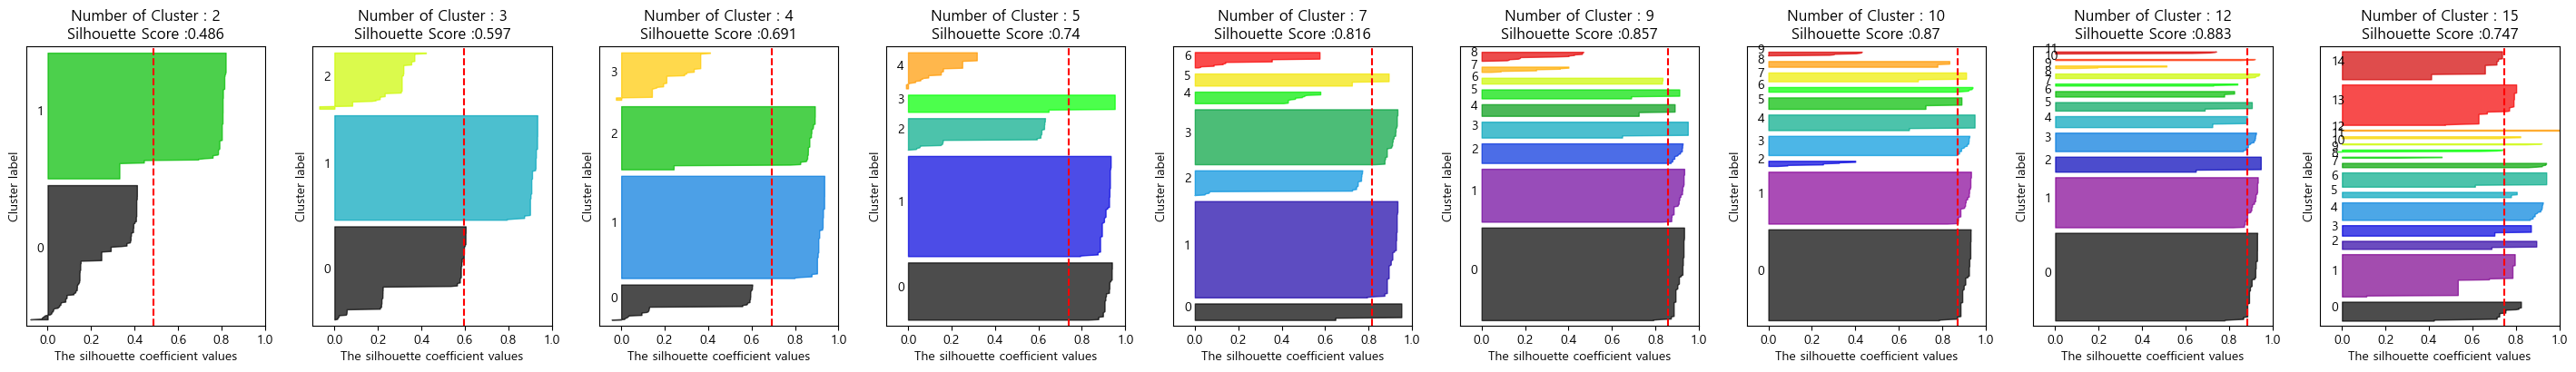

In [428]:
visualize_silhouette([2,3,4,5,7,9,10,12,15], X_mmsc1)
# 12Í∞úÍ∞Ä ÎêêÏùÑ Îïå Ïã§Î£®Ïó£ Í≥ÑÏàòÍ∞Ä 0.883ÏúºÎ°ú ÏµúÎåÄ

In [429]:
clst_kmeans = KMeans(n_clusters=12, random_state=100, max_iter=500)

model = clst_kmeans.fit(X_mmsc1)
clst_label = model.labels_

print(clst_label)

[ 0  0  3  1  0  0  0 10  0  1  0  8  8  0  0  0  0  0  0  0  0  8  1  0
  3  0  0  0  0  0  3  3  3  3  0  0  1  3  1  1  0  0  0  1  0  0  0  1
  1  0  0  0  3  0  0  0  0  0  1  0  1  0  0  1  0  1  1  1  0  1  1  0
  0  1  0  1  2  5  5  5  9  2  2  4  4  6  4  4  2  2  4  6  2  4  2  2
  2  6  2  2  2  9  4  2  7  4  5  5  6  5  4  2  4  9  6  7  2  2  4  5
  5  5  4  2  2  5  5  4  9  5  2  2  2  5  2  2  2  6  2  4  9  2  7  4
  3  1  3  3  1  0  1  0  0  1  3  8  1  8  3  0  0  0  0  0  0  0  0 11
  0  0  3  1  0  0  0  1  0  0  0  1  0  8 10  1  3  3  3  1  0  1  0  1
  0  0  0  0  1  0  0  0  0  0  0  0  3  1  1  1  0  0  0  1  0  0  1  0
  0  0  0  3  1  0  3  1  0  3  0  1  3 10  5  5  5  4  2  7  4  4  9  6
  5  4  6  6  4  6  6  4  7  4  6  2  2  4  5  2  2  0  0  0 11  0  0  3
  0  0  0  1  0  1  8  0  1  0  3  3  3  0  1  1  0  0  1  1  0  0  0  0
  0  1  0  0  1  0  1  0  0  0  0  0  0  1  3  0  1  0  0  0  1  3  3  0
  1  0  1  1  3  0  0  0  1  1  0  0  0  1  0  8 11

In [430]:
df_kmeans["NumberOfCluster"] = pd.Series(clst_label)
df_kmeans.tail()

inst_id  instkind_clinic  instkind_dental_clinic  \
423      355                0                       0   
424      207                0                       0   
425        5                0                       0   
426      398                0                       0   
427      430                0                       0   

     instkind_general_hospital  instkind_hospital  instkind_nursing_hospital  \
423                          0                  0                          1   
424                          0                  0                          1   
425                          0                  1                          0   
426                          0                  0                          1   
427                          0                  0                          0   

     instkind_traditional_clinic  instkind_traditional_hospital  tt_pop  \
423                            0                              0  280100   
424                            0                              0  280100   
425                            0                              0  657083   
426                            0                              0  657083   
427                            0                              0  657083   

     male_pop  female_pop  NumberOfCluster  
423    139734      140366                0  
424    139734      140366                0  
425    330823      326260                1  
426    330823      326260                0  
427    330823      326260               11

In [ ]:
# df_kmeans.head()

In [431]:
df_kmeans.groupby(by="NumberOfCluster", axis=0)["inst_id"].count()

NumberOfCluster
0     176
1     101
2      31
3      38
4      23
5      18
6      12
7       5
8      10
9       6
10      3
11      5
Name: inst_id, dtype: int64

In [432]:
# Ïû¨Î¨¥ Ï†ïÎ≥¥Í∞Ä Ìè¨Ìï®Îèº ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÎÑòÎ≤Ñ ÏÇΩÏûÖ
df_join_clst = pd.merge(df_clst, df_kmeans[["inst_id", "NumberOfCluster"]], how="left", left_on="inst_id", right_on="inst_id")
df_join_clst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        428 non-null    int64  
 1   OC                             301 non-null    float64
 2   dif_date                       427 non-null    float64
 3   bedCount                       415 non-null    float64
 4   busiProfit1                    418 non-null    float64
 5   busiProfit2                    418 non-null    float64
 6   profit1                        418 non-null    float64
 7   surplus1                       418 non-null    float64
 8   profit2                        418 non-null    float64
 9   surplus2                       418 non-null    float64
 10  employee1                      410 non-null    float64
 11  employee2                      400 non-null    float64
 12  instkind_clinic                428 non-null    int

In [ ]:
df_join_clst[df_join_clst.isna().any(axis=1)]

In [ ]:
# df_join_clst[df_join_clst.notnull().all(axis=1)].groupby("NumberOfCluster", axis=0).max()
df_join_clst.groupby("NumberOfCluster", axis=0).min()


In [ ]:
df_clst_median = df_join_clst.groupby("NumberOfCluster", axis=0).median()
df_clst_median

In [433]:
# Íµ∞ÏßëÎ≥Ñ ÌûàÏä§ÌÜ†Í∑∏Îû® ÌôïÏù∏

def sp_hist(DF=None, colClst=None, colhist=None, Range=None) :
    """
    Íµ∞ÏßëÎ≥Ñ ÌäπÏ†ï Ïª¨ÎüºÏùò ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.

    DF : ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïòÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    colClst : Íµ∞Ïßë Î≤àÌò∏Î•º ÌëúÏãúÌïòÎäî Ïª¨Îüº
    colhist : ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú ÌëúÌòÑÌïòÍ≥†Ïûê ÌïòÎäî Ïª¨Îüº
    """
    
    fig, axs = plt.subplots(figsize=(16, 32), nrows=4, ncols=3)
    # axsÎäî numpy ndarray ÌòïÏãù

    # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï Î∞è Íπ®Ïßê Î∞©ÏßÄ
    plt.rcParams['font.family'] = 'Malgun Gothic'
    matplotlib.rcParams['axes.unicode_minus'] = False
    
    for c in range(Range):
        dataframe = DF[DF[colClst]==c][colhist]
        # print("ÌòÑÏû¨ ÏàúÏÑú :",c)
        # print("Ìñâ :", c//3)
        # print("Ïó¥ :", c%3)
        axs[(c//3),(c % 3)].hist(dataframe, bins=20)
        axs[(c//3),(c % 3)].set_title('Number of Cluster : '+ str(c)+'\n' \
                            'Column Name :' + str(dataframe.name) )
        axs[(c//3),(c % 3)].set_xlabel("Í≥ÑÍ∏â")
        axs[(c//3),(c % 3)].set_ylabel("ÎèÑÏàò")

    plt.show()

    return

In [434]:
# Íµ∞ÏßëÎ≥Ñ boxplot ÌôïÏù∏
def sp_boxplot(DF=None, colClst=None, colbox=None, Range=None) :
    plt.figure(figsize=(28,20))
    plt.rcParams['font.family'] = 'Malgun Gothic'
    matplotlib.rcParams['axes.unicode_minus'] = False

    # rectangular box plot
    DF_box = pd.DataFrame()

    for c in range(Range) : 
        dataframe = DF[DF[colClst]==c][colbox]
        dataframe.rename(str(c), inplace=True)
        DF_box = pd.concat([DF_box, dataframe], axis=1)

    sns.boxplot(
                data = DF_box,
                orient='v'
                ) 
    plt.title("ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≥Ñ boxplot")

    plt.show()
    return

In [ ]:
# 17ÎÖÑÎèÑ ÎãπÍ∏∞ÏàúÏù¥Ïùµ ÌûàÏä§ÌÜ†Í∑∏Îû®
sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="profit1", Range=12)

In [ ]:
#17ÎÖÑÎèÑ ÎãπÍ∏∞ÏàúÏù¥Ïùµ Î∞ïÏä§ÌîåÎ°Ø
sp_boxplot(DF=df_join_clst, colClst="NumberOfCluster", colbox="profit1", Range=10)

In [ ]:
# test_df[test_df["1"].notnull()]

In [ ]:
# 16ÎÖÑÎèÑ ÎãπÍ∏∞ÏàúÏù¥Ïùµ
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="profit2")

In [ ]:
# 17ÎÖÑÎèÑ Ïù¥Ïùµ ÏûâÏó¨Í∏à
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="surplus1")

In [ ]:
# 16ÎÖÑÎèÑ Ïù¥Ïùµ ÏûâÏó¨Í∏à
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="surplus2")

In [ ]:
# 17ÎÖÑÎèÑ ÏßÅÏõêÏàò
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="employee1")

In [ ]:
# 16ÎÖÑÎèÑ ÏßÅÏõêÏàò
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="employee2")

- ÎãπÍ∏∞ÏàúÏù¥Ïùµ : Ï§ëÏïôÍ∞í
- Ïù¥ÏùµÏûâÏó¨Í∏à : Ï§ëÏïôÍ∞í
- ÏßÅÏõê Ïàò : 16ÎÖÑÎèÑÏôÄ 17ÎÖÑÎèÑÏùò Ï§ëÏïôÍ∞í

In [435]:
# Íµ∞ÏßëÎ≥Ñ Ï§ëÏïôÍ∞íÏúºÎ°ú Í≤∞Ï∏°Ïπò Ï±ÑÏõÄ

def fill_median(DF=None, colClst=None, colFill=None, numclst=None) :
    """
    Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ Îç∞Ïù¥ÌÑ∞Ïóê, Íµ∞ÏßëÎ≥Ñ Ï§ëÏïôÍ∞íÏùÑ Ï±ÑÏõå ÎÑ£Í≥†Ïûê Ìï®

    DF : ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïòÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    colClst : Íµ∞Ïßë Î≤àÌò∏Î•º ÌëúÏãúÌïòÎäî Ïª¨Îüº(str)
    colFill : Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö∞Í≥†Ïûê ÌïòÎäî Ïª¨Îüº Î¶¨Ïä§Ìä∏(list)
    numclst : ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò(int)
    """
    for cl in range(numclst) :
        for L in colFill :
            median_value = DF.loc[DF[colClst] == cl, L].median()
            DF.loc[(DF[colClst] == cl) & DF[L].isnull(), L] = median_value

    return DF

In [436]:
df_join_clst = fill_median(DF=df_join_clst, colClst="NumberOfCluster", 
                           colFill=["dif_date", "bedCount","busiProfit1","busiProfit2","profit1", \
                                    "profit2", "surplus1", "surplus2", "employee1", "employee2"], numclst=12)
df_join_clst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        428 non-null    int64  
 1   OC                             301 non-null    float64
 2   dif_date                       428 non-null    float64
 3   bedCount                       428 non-null    float64
 4   busiProfit1                    428 non-null    float64
 5   busiProfit2                    428 non-null    float64
 6   profit1                        428 non-null    float64
 7   surplus1                       428 non-null    float64
 8   profit2                        428 non-null    float64
 9   surplus2                       428 non-null    float64
 10  employee1                      428 non-null    float64
 11  employee2                      428 non-null    float64
 12  instkind_clinic                428 non-null    int

## SVDÎ•º ÏúÑÌïú ÏûëÏóÖ

Îç∞Ïù¥ÌÑ∞Ïùò ÏñëÏùÄ ÎèÖÎ¶ΩÎ≥ÄÏàò ÏàòÏùò 3Î∞∞ Ïù¥ÏÉÅÏùÄ ÎèºÏïº Ìï®.
ÎèÖÎ¶ΩÎ≥ÄÏàòÎ°ú ÏûëÏö©ÌïòÎäî Ïª¨Îüº ÏàòÍ∞Ä 57Í∞úÏù¥ÎØÄÎ°ú Îã§Ï§ë Í≥µÏÑ†ÏÑ±Í≥º Í≥ºÏ†ÅÌï©, Ï∞®ÏõêÏùò Ï†ÄÏ£ºÏùò ÏòÅÌñ•Ïù¥ ÏòàÏÉÅÎêòÎØÄÎ°ú
Ï∞®Ïõê Ï∂ïÏÜå ÌïÑÏöî  
  
Ïó¨Îü¨ ÌäπÏÑ±Îì§Î°ú Íµ¨ÏÑ±Îêú Îã§Ï∞®ÏõêÏùò Îç∞Ïù¥ÌÑ∞ ÏÖãÏùò Ï∞®ÏõêÏùÑ Ï∂ïÏÜåÌï¥ ÏÉàÎ°úÏö¥ Ï∞®ÏõêÏùò Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º ÏÉùÏÑ±  

In [437]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò Ïª¨Îüº ÏÉ§ÌîºÎ°ú ÏúåÌÅ¨ Í≤ÄÏ†ïÏúºÎ°ú Ï†ïÍ∑úÏÑ± ÌôïÏù∏
# H0 : Î≥ÄÏàòÎäî Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§.
# H1 : Î≥ÄÏàòÎäî Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•¥ÏßÄ ÏïäÎäîÎã§.

cnt = 0

for i in range(df_join_clst.shape[1]) : 
    cnt += 1
    shapiro_tt = stats.shapiro(df_join_clst.iloc[:,i])
    print(cnt)
    if shapiro_tt[1] > 0.05 : 
        print("Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú")
        print("Ïª¨ÎüºÎ™Ö ",df_join_clst.columns[i],"Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.")
    else : 
        print("Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú")
        print("Ïª¨ÎüºÎ™Ö ",df_join_clst.columns[i],"Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
    print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-")

1
Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú
Ïª¨ÎüºÎ™Ö  inst_id Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏóÜÏäµÎãàÎã§.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
2
Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú
Ïª¨ÎüºÎ™Ö  OC Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
3
Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú
Ïª¨ÎüºÎ™Ö  dif_date Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏóÜÏäµÎãàÎã§.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
4
Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú
Ïª¨ÎüºÎ™Ö  bedCount Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏóÜÏäµÎãàÎã§.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
5
Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú
Ïª¨ÎüºÎ™Ö  busiProfit1 Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏóÜÏäµÎãàÎã§.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
6
Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú
Ïª¨ÎüºÎ™Ö  busiProfit2 Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, Ï†ïÍ∑úÏÑ±

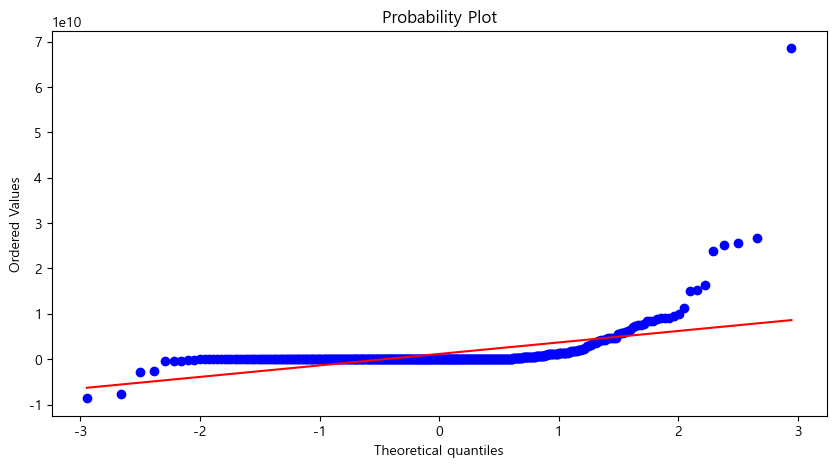

In [438]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))    # Í∑∏ÎûòÌîÑ ÏÇ¨Ïù¥Ï¶à ÏßÄÏ†ï
stats.probplot(df_join_clst.iloc[:,9], dist=stats.norm, plot=plt) #SampleÏùÄ Ïñ¥Îäê Ï†ïÎèÑ Ïñ¥Í∏ãÎÇ¨ÎäîÏßÄ ÎπÑÍµêÌï† Î∂ÑÌè¨,
                                                  #distÎäî Í∏∞Ï§ÄÏù¥ ÎêòÎäî Î∂ÑÌè¨, Ï†ïÍ∑ú Î∂ÑÌè¨Í∞Ä ÏïÑÎãàÏñ¥ÎèÑ ÎêúÎã§.
                                                  #plotÏùÄ Ï£ºÎ°ú matplotlib.plt Í∞ùÏ≤¥ ÏÇ¨Ïö©
plt.show()

SVDÎ•º ÌÜµÌï¥, AÎùºÎäî ÏûÑÏùòÏùò ÌñâÎ†¨ÏùÑ Ïó¨Îü¨Í∞úÏùò A ÌñâÎ†¨Í≥º ÎèôÏùºÌïú ÌÅ¨Í∏∞Î•º Í∞ñÎäî Ïó¨Îü¨Í∞úÏùò ÌñâÎ†¨Î°ú Î∂ÑÌï¥Ìï¥ÏÑú ÏÉùÍ∞ÅÌï† Ïàò ÏûàÎäîÎç∞, Î∂ÑÌï¥Îêú Í∞Å ÌñâÎ†¨Ïùò ÏõêÏÜåÏùò Í∞íÏùò ÌÅ¨Í∏∞Îäî œÉÏùò Í∞íÏùò ÌÅ¨Í∏∞Ïóê ÏùòÌï¥ Í≤∞Ï†ïÎêúÎã§.  
Îã§Ïãú ÎßêÌï¥, SVDÎ•º Ïù¥Ïö©Ìï¥ ÏûÑÏùòÏùò ÌñâÎ†¨ AÎ•º Ï†ïÎ≥¥ÎüâÏóê Îî∞Îùº Ïó¨Îü¨ layerÎ°ú Ï™ºÍ∞úÏÑú ÏÉùÍ∞ÅÌï† Ïàò ÏûàÍ≤å Ìï¥Ï§ÄÎã§.  
Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Í∞Ä Ïä§ÏºÄÏùºÎßÅÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ï§ëÏã¨Ïù¥ ÎèôÏùºÌï¥ÏßÄÎ©¥ ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò SVDÏôÄ PCAÎäî ÎèôÏùºÌïú Î≥ÄÌôòÏùÑ ÏàòÌñâÌïòÎ©∞, Ìù¨ÏÜå ÌñâÎ†¨(Sparse Matrix)Ïóê ÎåÄÌïú Î≥ÄÌôòÎèÑ Í∞ÄÎä•

In [439]:
# test Îç∞Ïù¥ÌÑ∞Ïùò inst_idÍ∞Ä Í∞ôÏùÄ Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
df_dvd_test = pd.merge(left=df_join_clst, right=df_t["inst_id"], how="inner", on="inst_id")
df_dvd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        127 non-null    int64  
 1   OC                             0 non-null      float64
 2   dif_date                       127 non-null    float64
 3   bedCount                       127 non-null    float64
 4   busiProfit1                    127 non-null    float64
 5   busiProfit2                    127 non-null    float64
 6   profit1                        127 non-null    float64
 7   surplus1                       127 non-null    float64
 8   profit2                        127 non-null    float64
 9   surplus2                       127 non-null    float64
 10  employee1                      127 non-null    float64
 11  employee2                      127 non-null    float64
 12  instkind_clinic                127 non-null    int

In [440]:
# test Îç∞Ïù¥ÌÑ∞Ïùò inst_idÍ∞Ä Îã§Î•∏ Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú >> train Îç∞Ïù¥ÌÑ∞
# indicator=TrueÎäî mergeÎêú Í∞Å ÌñâÏùò Ï†ïÎ≥¥Î•º ÏïåÎ†§Ï§å
# leftÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÌñâÏù¥ÎùºÎ©¥ left_only
# rightÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÌñâÏù¥ÎùºÎ©¥ right_only
# Îëò Îã§ Ï°¥Ïû¨ÌïòÎ©¥ both
df_dvd_train = pd.merge(left=df_join_clst, right=df_t["inst_id"], how="outer", on="inst_id", indicator=True)
df_dvd_train = df_dvd_train[df_dvd_train["_merge"]=="left_only"].iloc[:,:df_dvd_train.shape[1]-1]
df_dvd_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 0 to 423
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        301 non-null    int64  
 1   OC                             301 non-null    float64
 2   dif_date                       301 non-null    float64
 3   bedCount                       301 non-null    float64
 4   busiProfit1                    301 non-null    float64
 5   busiProfit2                    301 non-null    float64
 6   profit1                        301 non-null    float64
 7   surplus1                       301 non-null    float64
 8   profit2                        301 non-null    float64
 9   surplus2                       301 non-null    float64
 10  employee1                      301 non-null    float64
 11  employee2                      301 non-null    float64
 12  instkind_clinic                301 non-null    int32  


In [441]:
df_join_clst = pd.concat([df_dvd_train, df_dvd_test], axis=0)
df_join_clst.iloc[301:310, :]

inst_id  OC  dif_date  bedCount      busiProfit1      busiProfit2  \
0      167 NaN  3296.000   190.000  -2679160450.000  -2738795101.000   
1      206 NaN  7915.000   339.000 -33465007645.000 -26748033398.000   
2      213 NaN  4114.000    86.000  -1086585119.000  -1124618425.000   
3      294 NaN  3762.000   124.000  -1206405281.000  -1317281616.000   
4      348 NaN  2464.000   162.000  -1746673894.000  -1597028449.000   
5      403 NaN  1467.000   148.000  -1993093367.000  -1953488688.000   
6      404 NaN  2289.000   149.000   -894151821.000   -670293289.000   
7       88 NaN  3556.000   187.000  -4870080470.000  -4460228116.000   
8      121 NaN  3001.000    59.000  -2998864765.000  -2767693549.000   

          profit1        surplus1         profit2        surplus2  ...  \
0   177723034.000           0.000   164882160.000           0.000  ...   
1 11208159317.000 34114713245.000 11303536389.000 25142083421.000  ...   
2    61977837.000           0.000    66786924.000           0.000  ...   
3   122712741.000           0.000   -42332310.000           0.000  ...   
4    54932529.000           0.000    59725585.000           0.000  ...   
5   -76372463.000           0.000  -130086715.000           0.000  ...   
6    41436658.000           0.000    42185031.000           0.000  ...   
7   147691324.000           0.000   186853888.000           0.000  ...   
8  -267732218.000   606276675.000   -66959869.000   606276675.000  ...   

   sido_ÏÑúÏö∏ÌäπÎ≥ÑÏãú  sido_ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú  sido_Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú  sido_Ïù∏Ï≤úÍ¥ëÏó≠Ïãú  sido_Ï†ÑÎùºÎÇ®ÎèÑ  sido_Ï†ÑÎùºÎ∂ÅÎèÑ  \
0           0             0           0           0          0          0   
1           0             0           0           0          0          0   
2           0             0           0           0          0          0   
3           0             0           0           0          0          0   
4           0             0           0           0          0          0   
5           0             0           0           0          0          0   
6           0             0           0           0          0          0   
7           0             0           0           0          0          0   
8           0             0           0           0          0          0   

   sido_Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  sido_Ï∂©Ï≤≠ÎÇ®ÎèÑ  sido_Ï∂©Ï≤≠Î∂ÅÎèÑ  NumberOfCluster  
0             0          1          0                0  
1             0          1          0                3  
2             0          1          0                0  
3             0          1          0                0  
4             0          1          0                0  
5             0          1          0                0  
6             0          1          0                0  
7             0          0          0                1  
8             0          0          0                1  

[9 rows x 40 columns]

In [ ]:
df_join_clst[df_join_clst["OC"].isnull()]

In [ ]:
df_join_clst.iloc[:,-37:-1]

In [442]:
scaler2 = MinMaxScaler()

scalerX2 = scaler2.fit(df_join_clst.iloc[:,-37:-1])

X_mmsc2 = scaler2.transform(df_join_clst.iloc[:,-37:-1])

X_mmsc2

array([[0.22697795, 0.86820533, 0.83776457, ..., 0.        , 1.        ,
        0.        ],
       [0.33463035, 0.86540568, 0.82666881, ..., 0.        , 1.        ,
        0.        ],
       [0.44228275, 0.66089384, 0.6635577 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.05706874, 0.72421503, 0.63005386, ..., 1.        , 0.        ,
        0.        ],
       [0.01686122, 0.87044337, 0.84469862, ..., 1.        , 0.        ,
        0.        ],
       [0.08300908, 0.90136396, 0.86937012, ..., 1.        , 0.        ,
        0.        ]])

In [443]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Ï∞®Ïõê Ï∂ïÏÜåÎ•º ÏúÑÌïú SVD ÏàòÌñâ
svd = TruncatedSVD(n_components=10)
make_svd = svd.fit(X_mmsc2)
X_svd = svd.transform(X_mmsc2)
X_svd

array([[ 1.52618538e+00, -7.30253965e-01,  2.72111167e-01, ...,
         9.22712041e-02, -5.28232808e-01, -4.60286942e-01],
       [ 1.56594124e+00, -7.36576064e-01,  2.64341865e-01, ...,
         6.94720201e-02, -5.26959958e-01, -4.57357381e-01],
       [ 1.14372991e+00, -1.76874813e-02, -1.62755925e-01, ...,
         2.35712192e-03, -5.71078712e-01, -5.53923065e-01],
       ...,
       [ 1.01879265e+00,  1.14565174e-03, -9.47077597e-01, ...,
        -1.44421577e-01, -3.51715299e-02, -1.98819908e-02],
       [ 1.38887376e+00, -7.69425725e-01,  1.80222126e-01, ...,
        -1.71748772e-02, -1.78163949e-02,  2.34601216e-02],
       [ 1.14275799e+00, -2.41468775e-01, -3.26230727e-01, ...,
         9.66964947e-02, -4.15942858e-02, -6.71096426e-02]])

# Î™®Îç∏ÌïôÏäµ

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=626, stratify=y)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [ ]:
df_t.shape[0]

In [ ]:
X_svd.shape

In [ ]:
print(X_svd.shape[0]-df_t.shape[0])

Î≥¥ÌÜµ Î™®Îç∏Ïùò ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º 'train_test_split' Î©îÏÑúÎìúÎ•º ÌÜµÌï¥ Î∂ÑÎ¶¨Ìï©ÎãàÎã§.  
Îç∞Ïù¥ÌÑ∞Î•º Î¨¥ÏûëÏúÑÎ°ú Î∂ÑÎ¶¨ÌïòÍ≥† Ï¢ÖÏÜç Î≥ÄÏàòÏùò ÏàòÍ∞Ä ÏùºÏ†ïÌïòÏßÄ ÏïäÏùÑ Îïå Ï¢ÖÏÜç Î≥ÄÏàò ÎπÑÏú®Ïóê ÎßûÏ∂∞ÏÑú Î∂ÑÎ¶¨Ìï¥ Ï£ºÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.ü´°  
ÌïòÏßÄÎßå Ïö∞Î¶¨Îäî Ï≤òÏùåÎ∂ÄÌÑ∞ train.csvÏôÄ test.csvÎ°ú ÎÇòÎà†Ï†∏ ÏûàÏóàÍ∏∞ ÎïåÎ¨∏Ïóê  
Ï≤òÏùå Í∑∏ÎåÄÎ°ú ÎÇòÎà†Ïïº Ìï©ÎãàÎã§!‚å®Ô∏è

In [444]:
X_train_origin = X_svd[:301]
X_test_origin = X_svd[301:]
print("ÌïôÏäµÏö© ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò shape : ",X_train_origin.shape)
print("ÌÖåÏä§Ìä∏ ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò shape : ",X_test_origin.shape)

ÌïôÏäµÏö© ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò shape :  (301, 10)
ÌÖåÏä§Ìä∏ ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò shape :  (127, 10)


In [445]:
y_train_origin = df_join_clst.iloc[:301,1]
y_test_origin = df_join_clst.iloc[301:,1]
print("ÌïôÏäµÏö© Ï¢ÖÏÜçÎ≥ÄÏàòÏùò shape : ",y_train_origin.shape)
print("ÌÖåÏä§Ìä∏ Ï¢ÖÏÜçÎ≥ÄÏàòÏùò shape : ",y_test_origin.shape)

ÌïôÏäµÏö© Ï¢ÖÏÜçÎ≥ÄÏàòÏùò shape :  (301,)
ÌÖåÏä§Ìä∏ Ï¢ÖÏÜçÎ≥ÄÏàòÏùò shape :  (127,)


In [446]:
X_train, X_test, y_train, y_test = train_test_split(X_train_origin, y_train_origin, test_size=0.3,random_state=100, stratify=y_train_origin)
print("train ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", X_train.shape)
print("test ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", X_test.shape)
print("train Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", y_train.shape)
print("test Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", y_test.shape)

train ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (210, 10)
test ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (91, 10)
train Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (210,)
test Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (91,)


In [447]:
model_xgb = XGBClassifier()
xgb_model = model_xgb.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
# y_pred_prob = xgb_model.predict_proba(X_test)[:1]
print("Ï†ïÌôïÎèÑ : ",accuracy_score(y_test, y_pred))
print("f1 socre : ",f1_score(y_test, y_pred))

Ï†ïÌôïÎèÑ :  0.945054945054945
f1 socre :  0.9717514124293786


In [467]:
model_xgb_r = XGBClassifier(n_estimators=50,
                            max_depth = 6,
                            grow_policy='lossguide',
                            learning_rate=0.5,
                            min_child_weight=1,
                            reg_lambda=1)
xgb_model_r = model_xgb_r.fit(X_train, y_train)

y_pred_r = xgb_model_r.predict(X_test)
# y_pred_prob = xgb_model.predict_proba(X_test)[:1]
print("Ï†ïÌôïÎèÑ : ",accuracy_score(y_test, y_pred_r))
print("f1 socre : ",f1_score(y_test, y_pred_r))

Ï†ïÌôïÎèÑ :  0.945054945054945
f1 socre :  0.9717514124293786


In [448]:
X2 = df_drop_vif.iloc[:,1:]
y2 = df_drop_vif.iloc[:,0]

X_train2, X_test2, y_train2, y_test2= train_test_split(X2, y2, test_size=0.3, random_state=100, stratify=y2)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

model_xgb2 = XGBClassifier()
xgb_model2 = model_xgb2.fit(X_train2, y_train2)

y_pred2 = xgb_model2.predict(X_test2)
y_pred_prob2 = xgb_model2.predict_proba(X_test2)[:1]

print("Ï†ïÌôïÎèÑ : ",accuracy_score(y_test2, y_pred2))
print("f1 socre : ",f1_score(y_test2, y_pred2))

(193, 5)
(84, 5)
(193,)
(84,)
Ï†ïÌôïÎèÑ :  0.9761904761904762
f1 socre :  0.9879518072289156


In [449]:
X3 = df_dr2.iloc[:,2:]
y3 = df_dr2.iloc[:,1]
# print(y_train_red)
# print(y_train_red.shape)

In [450]:
X_train3, X_test3, y_train3, y_test3= train_test_split(X3, y3, test_size=0.3, random_state=100, stratify=y3)
print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

model_xgb_svd = XGBClassifier()
xgb_model_svd = model_xgb_svd.fit(X_train3, y_train3)

y_pred3 = xgb_model_svd.predict(X_test3)

print("Ï†ïÌôïÎèÑ : ",accuracy_score(y_test3, y_pred3))
print("f1 socre : ",f1_score(y_test3, y_pred3))

(193, 53)
(84, 53)
(193,)
(84,)
Ï†ïÌôïÎèÑ :  0.9761904761904762
f1 socre :  0.9879518072289156


# Î≥ëÏõê Ï†ïÎ≥¥ api Î∂àÎü¨Ïò§Í∏∞

In [ ]:
"""
https://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList?serviceKey=repbMvjCXw96iTs6wjKM3Htm1H480VcdawruKmikMmOYZF8aVD%2FrJDkfGoyLeTuS5Y1KEOzUrwwPIu87UQ9LbQ%3D%3D&pageNo=1&numOfRows=10&sidoCd=110000&sgguCd=110019&emdongNm=%EC%8B%A0%EB%82%B4%EB%8F%99&yadmNm=%EC%84%9C%EC%9A%B8%EC%9D%98%EB%A3%8C%EC%9B%90&zipCd=2010&clCd=11&dgsbjtCd=01&xPos=127.09854004628151&yPos=37.6132113197367&radius=3000
"""

In [ ]:
serviceKey = "repbMvjCXw96iTs6wjKM3Htm1H480VcdawruKmikMmOYZF8aVD/rJDkfGoyLeTuS5Y1KEOzUrwwPIu87UQ9LbQ=="
serviceKeyDecoded = parse.unquote(serviceKey, 'UTF-8')

url = "http://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList"
returnType="xml"
Pindex = 1
Psize = 1000


queryParams = '?' + parse.urlencode({ parse.quote_plus("serviceKey") : serviceKeyDecoded,
                                parse.quote_plus("numOfRows") : '10000',
                                parse.quote_plus("pageNo") : '2'
                                    })

res = requests.get(url + queryParams)

In [ ]:
soup = BeautifulSoup(res.text, 'lxml-xml')
items = soup.find_all("item")

In [ ]:
pprint.pprint(items)

In [ ]:
len(items)

In [ ]:
def parse():
    try:
        ADDR = item.find("addr").get_text()
        CLCD = item.find("clCd").get_text()
        CLCDNM = item.find("clCdNm").get_text()
        EMDONGNM = item.find("emdongNm").get_text()
        ESTBDB = item.find("estbDd").get_text()
        POSTNO = item.find("postNo").get_text()
        SGGUCD = item.find("sgguCd").get_text()
        SGGUCDNM = item.find("sgguCdNm").get_text()
        SIDOCD = item.find("sidoCd").get_text()
        SIDOCDNM = item.find("sidoCdNm").get_text()
        XPOS = item.find("XPos").get_text()
        YPOS = item.find("YPos").get_text()
        YADMNM = item.find("yadmNm").get_text()
        YKIHO = item.find("ykiho").get_text()
        return {
            "Ï£ºÏÜå":ADDR,
            "Ï¢ÖÎ≥ÑÏΩîÎìú":CLCD,
            "Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö":CLCDNM,
            "ÏùçÎ©¥Îèô":EMDONGNM,
            "Í∞úÏÑ§ÏùºÏûê":ESTBDB,
            "Post No.":POSTNO,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìú":SGGUCD,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö":SGGUCDNM,
            "ÏãúÎèÑÏΩîÎìú":SIDOCD,
            "ÏãúÎèÑÏΩîÎìúÎ™Ö":SIDOCDNM,
            "xÏ¢åÌëú":XPOS,
            'yÏ¢åÌëú':YPOS,
            "ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö":YADMNM,
            "ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏":YKIHO
        }
    except AttributeError as e:
        return {
            "Ï£ºÏÜå":None,
            "Ï¢ÖÎ≥ÑÏΩîÎìú":None,
            "Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö":None,
            "ÏùçÎ©¥Îèô":None,
            "Í∞úÏÑ§ÏùºÏûê":None,
            "Post No.":None,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìú":None,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö":None,
            "ÏãúÎèÑÏΩîÎìú":None,
            "ÏãúÎèÑÏΩîÎìúÎ™Ö":None,
            "xÏ¢åÌëú":None,
            'yÏ¢åÌëú':None,
            "ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö":None,
            "ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏":None
        }

In [ ]:
row = list()

for item in items : 
    row.append(parse())

In [ ]:
df_api = pd.DataFrame(row)
df_api.head()

In [ ]:
df_api.shape[0] - df_api.count()

In [ ]:
df_api.dropna(axis=0, how="any", inplace=True)
df_api.shape

In [ ]:
df_api.to_csv(dirShare+"/data/Î≥ëÏõêÏ†ïÎ≥¥api_day2.csv",sep=',', encoding="utf-8")

In [ ]:
df_day1  = pd.read_csv(dirShare+"/data/Î≥ëÏõêÏ†ïÎ≥¥api.csv")
df_day1.info()
df_day1.head(10)

In [ ]:
df_day2  = pd.read_csv(dirShare+"/data/Î≥ëÏõêÏ†ïÎ≥¥api_day2.csv")
df_day2.info()
df_day2.head(10)

In [ ]:
df_day1.sort_values(by='Ï¢ÖÎ≥ÑÏΩîÎìú', axis=0, ascending=True)

In [ ]:
df_day2.sort_values(by='Ï¢ÖÎ≥ÑÏΩîÎìú', axis=0, ascending=True)